<a href="https://colab.research.google.com/github/DevRaylan/Analise-de-dados/blob/main/comportamentos_entre_homens_e_mulheres%20-%20Lista%201%20-%20E1%20-%20Data%20Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Definição de Data Science (Ciência de Dados):**
Data Science é uma área interdisciplinar que combina estatística, aprendizado de máquina, mineração de dados, ciência da computação e conhecimento de domínio específico para extrair insights úteis a partir de grandes volumes de dados. O objetivo é transformar dados brutos em informações que apoiem a tomada de decisão, a automação de processos ou a criação de produtos.

Ela envolve várias etapas: coleta de dados, limpeza, análise exploratória, modelagem preditiva e comunicação dos resultados.

Exemplo de problema real baseado no livro ("Data Mining – Concepts and Techniques", 2015). Um exemplo citado no livro é o da descoberta de padrões de compra em supermercados por meio da análise de cestas de compras(basket analysis). Usando técnicas de mineração de regras de associação(como o algoritmo Apriori), os analistas conseguiram identificar que clientes que compram fraldas também tendem a comprar cerveja nas sextas-feiras. Isso levou à reorganização do layout das prateleiras e promoções direcionadas, aumentando as vendas e a eficiência das estratégias de marketing.

# **Resumo Crítico**
A análise teve como objetivo investigar duas variáveis numéricas do conjunto heart.csv **Cholesterol** e **MaxHR** e comparar seus comportamentos entre homens e mulheres. Calculei, para cada variável e grupo, o total, média, desvio quadrático, variância e desvio padrão. Os resultados mostram que homens, em média, apresentam níveis mais altos de colesterol, enquanto as mulheres tendem a apresentar frequência cardíaca máxima *MaxHR* mais elevada.


In [3]:
import pandas as pd

# Carregar o dataset
df = pd.read_csv("/content/heart.csv")

# Exibir as primeiras linhas
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Dividir o DataFrame entre Masculino e Feminino
masculino = df[df["Sex"] == "M"]
feminino = df[df["Sex"] == "F"]


In [5]:
# Selecionar variáveis numéricas
variaveis = ["Cholesterol", "MaxHR"]

# Criar dicionário para armazenar estatísticas
def estatisticas(df):
    totais = df[variaveis].sum()
    medias = df[variaveis].mean()
    desv_quad = ((df[variaveis] - medias) ** 2).sum()
    variancia = df[variaveis].var()
    desvio_padrao = df[variaveis].std()

    return pd.DataFrame({
        "Total": totais,
        "Média": medias,
        "Desvio Quadrático": desv_quad,
        "Variância": variancia,
        "Desvio Padrão": desvio_padrao
    })

# Calcular para homens e mulheres
estat_masc = estatisticas(masculino)
estat_fem = estatisticas(feminino)

print("Estatísticas - Homens")
display(estat_masc)

print("Estatísticas - Mulheres")
display(estat_fem)


Estatísticas - Homens


,Total,Média,Desvio Quadrático,Variância,Desvio Padrão
Cholesterol,135947,187.513103,9.138941e+06,12622.846858,112.351444
MaxHR,97386,134.325517,4.789092e+05,661.476765,25.719191


Estatísticas - Mulheres


,Total,Média,Desvio Quadrático,Variância,Desvio Padrão
Cholesterol,46551,241.196891,1.393587e+06,7258.263115,85.195441
MaxHR,28205,146.139896,9.424122e+04,490.839702,22.154902


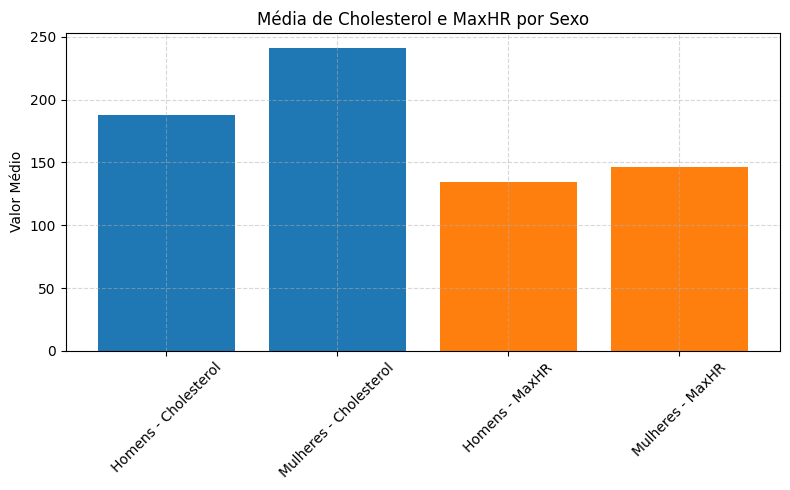

In [6]:
import matplotlib.pyplot as plt

# Gráfico de barras comparando as médias
plt.figure(figsize=(8, 5))
plt.bar(["Homens - Cholesterol", "Mulheres - Cholesterol"],
        [estat_masc.loc["Cholesterol", "Média"], estat_fem.loc["Cholesterol", "Média"]],
        label="Cholesterol")
plt.bar(["Homens - MaxHR", "Mulheres - MaxHR"],
        [estat_masc.loc["MaxHR", "Média"], estat_fem.loc["MaxHR", "Média"]],
        label="MaxHR")
plt.ylabel("Valor Médio")
plt.title("Média de Cholesterol e MaxHR por Sexo")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
